In [154]:
# Importing required libraries:::
import cv2
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf

### Implement the Harris algorithm using OpenCV.

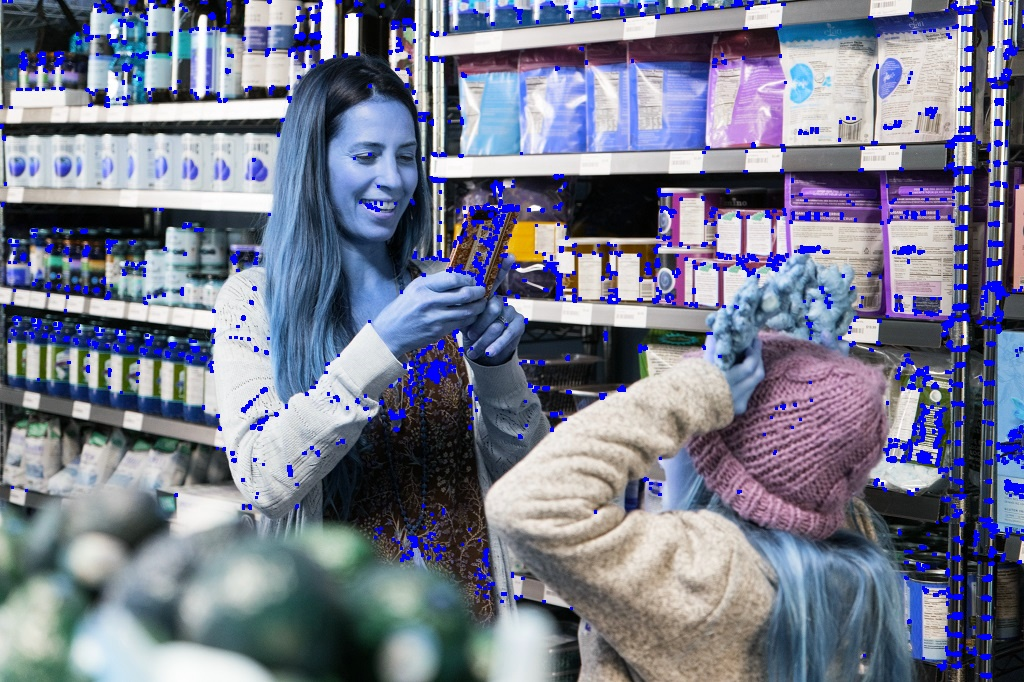

In [155]:
img = cv2.imread('./data/images/store_cam1.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
 
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
 
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(Image(data=cv2.imencode('.jpg', img_rgb)[1].tobytes()))


### Implement Image Pyramid using OpenCV. 

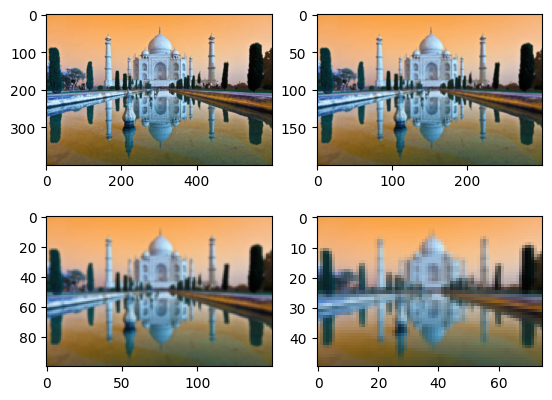

In [156]:
img = cv2.imread("./data/images/landmark7.jpg") 
  
layer = img.copy() 
  
for i in range(4): 
    plt.subplot(2, 2, i + 1) 
  
    # using pyrDown() function 
    layer = cv2.pyrDown(layer) 
  
    plt.imshow(layer) 
    # cv2.imshow("str(i)", layer) 
    cv2.waitKey(0) 
      
  
cv2.destroyAllWindows() 


### Implement the SURF algorithm using OpenCV Or Implement Image Segmentation with Watershed Algorithm using OpenCV. 

In [157]:
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

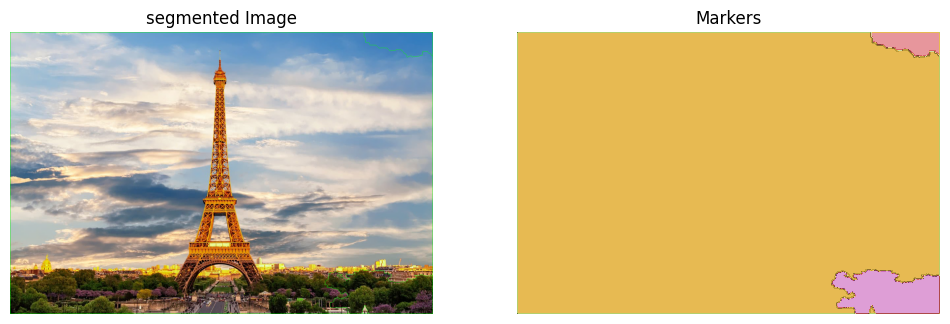

In [158]:
# Load the image
image = cv2.imread('./data/images/landmark.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark unknown region with 0
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 255, 0]  # Mark watershed boundaries in red

# Display the result using subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('segmented Image')
axes[0].axis('off')

# Display the markers
axes[1].imshow(markers, cmap='tab20b')
axes[1].set_title('Markers')
axes[1].axis('off')

plt.show()

### Implement SIFT algorithm using OpenCV.

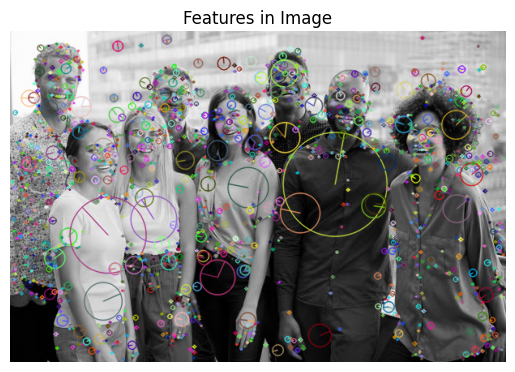

In [159]:
img = cv2.imread('./data/images/people.jpg')
 
 # Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# Applying SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
 
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Features in Image')
plt.axis('off')
plt.show()

### Implement object detection using YOLO on the COCO dataset. Provide the results for any 5 images (for testing purposes) from the dataset.

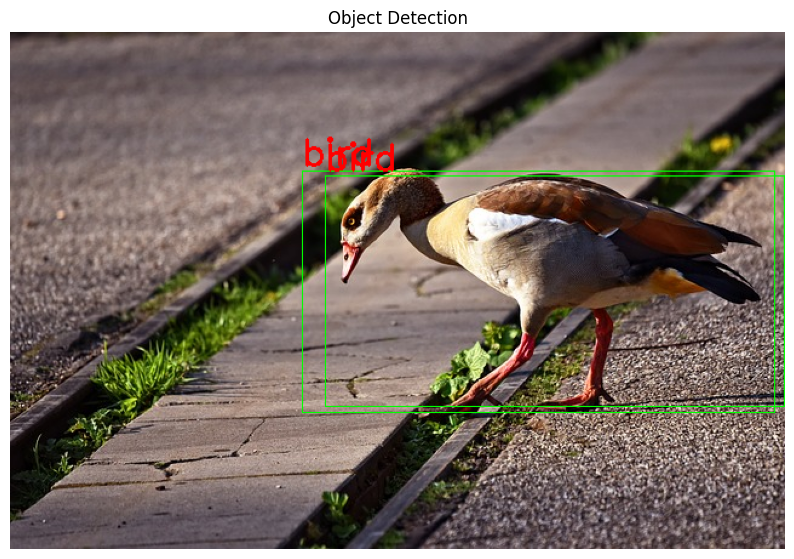

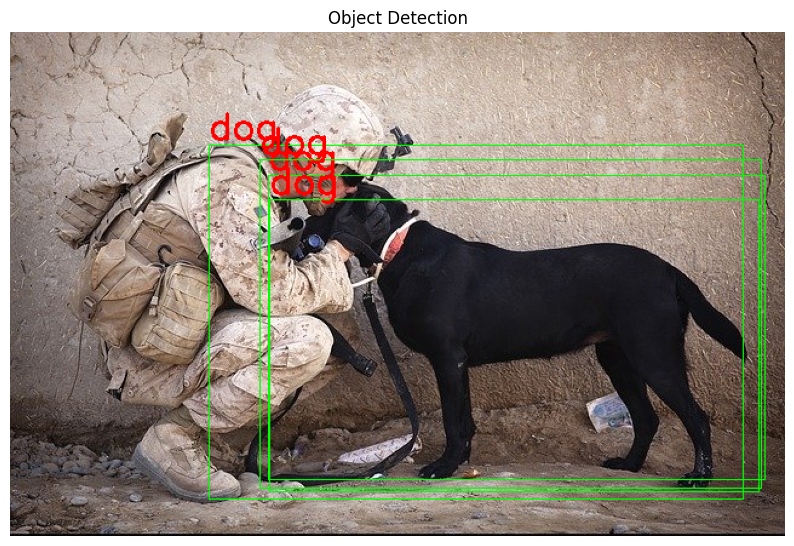

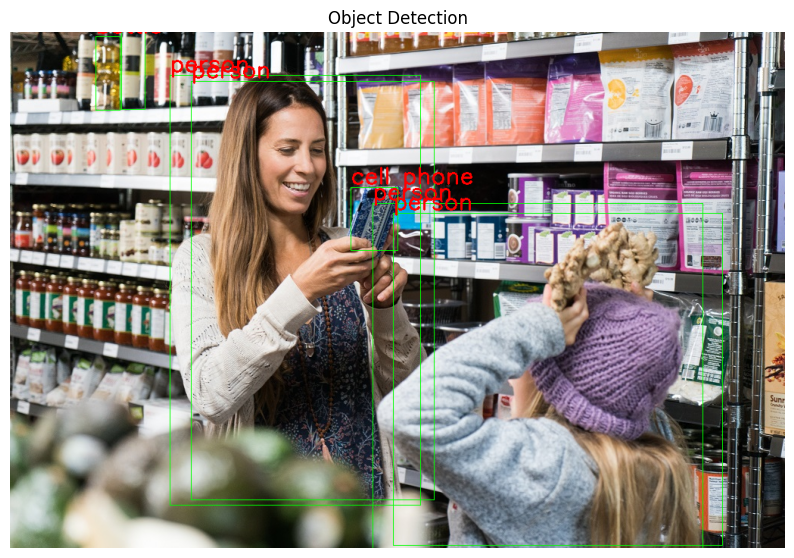

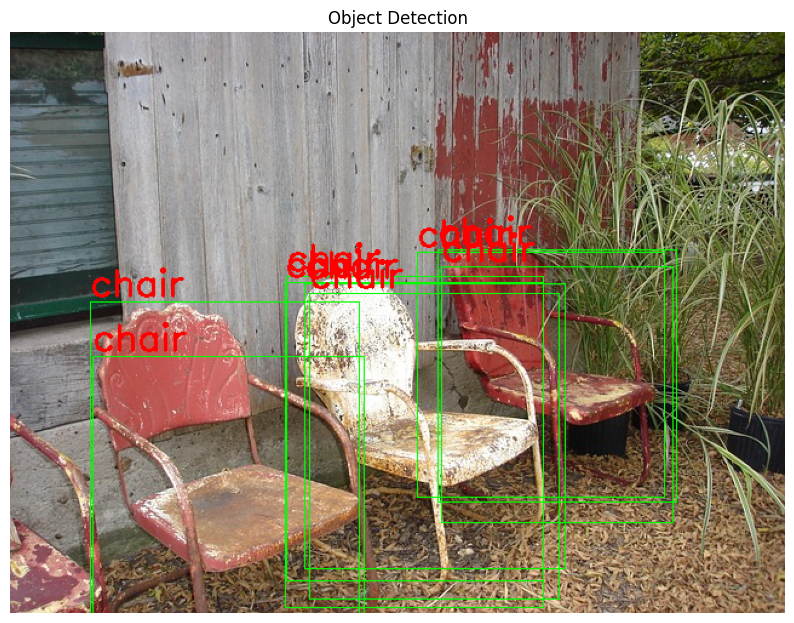

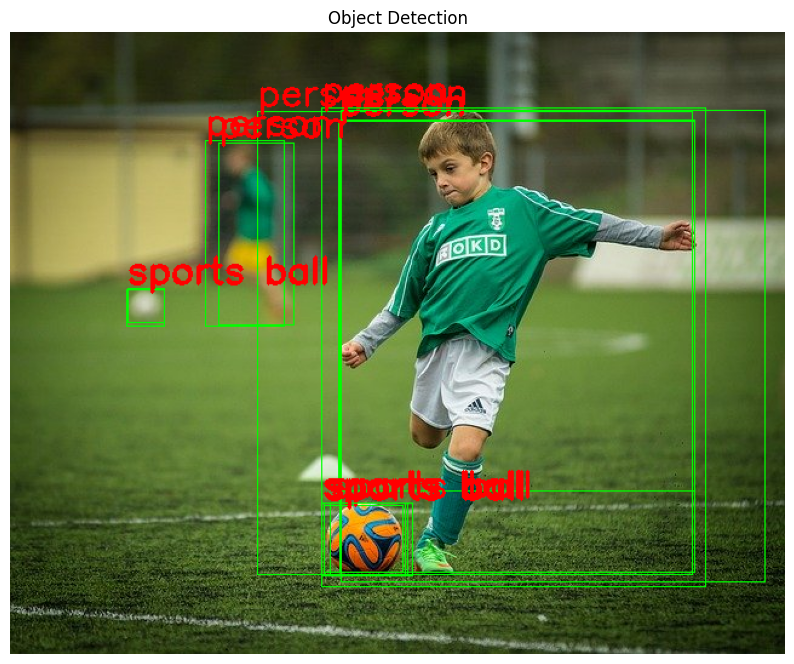

In [160]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

if net.empty():
    print("Error: Unable to load YOLOv3 model.")
    exit()

# Load COCO class labels
with open('coco_labels.txt', 'r') as f:
    class_labels = f.read().strip().split('\n')

# Load 5 sample images from the COCO dataset
image_paths = ['./data/images/6.jpg', './data/images/7.jpg', './data/images/store_cam1.jpg', './data/images/3.jpg', './data/images/4.jpg']

# Define the output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

# Perform object detection on each image
for image_path in image_paths:
    # Load image
    image = cv2.imread(image_path)
    height, width, channels = image.shape

    # Perform blob preprocessing
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Process detections
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.85:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Draw bounding box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
                cv2.putText(image, class_labels[class_id], (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 15))
    plt.imshow(image_rgb)
    plt.title('Object Detection')
    plt.axis('off')
    plt.show()